In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cette partie est pour les clients morales

In [2]:
mc_data = pd.read_csv('../cleaned-data/production/final-mc-data.csv', encoding='iso-8859-1', sep='\t')

In [3]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745203 entries, 0 to 2745202
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   COMAX       object 
 2   CTPE        int64  
 3   CORELB      int64  
 4   PCA-1       float64
 5   PCA-2       float64
 6   PCA-3       float64
 7   PCA-4       float64
 8   PCA-5       float64
 9   PCA-6       float64
 10  PCA-7       float64
 11  PCA-8       float64
 12  PCA-9       float64
 13  PCA-10      float64
dtypes: float64(10), int64(3), object(1)
memory usage: 293.2+ MB


In [9]:
list(mc_data.columns)[2:]

['CTPE',
 'CORELB',
 'PCA-1',
 'PCA-2',
 'PCA-3',
 'PCA-4',
 'PCA-5',
 'PCA-6',
 'PCA-7',
 'PCA-8',
 'PCA-9',
 'PCA-10']

In [10]:
WCSS = list()
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters=clusters, init='k-means++')
    
    # WCSS: Within Cluster Sum of Squares
    kmeans.fit(mc_data[list(mc_data.columns)[2:]])
    WCSS.append(kmeans.inertia_)

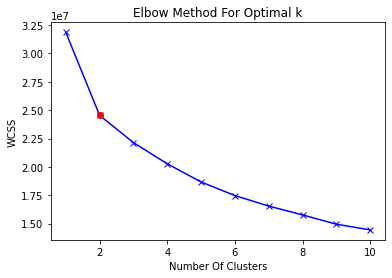

In [16]:
plt.plot(range(1, 11), WCSS, 'bx-')
plt.plot([2], WCSS[1], 'ro')  # c='r', marker='o'
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

### As we can see here, the value of cluster 2 is the elbow point, therefore the number of clusters is 2.

In [17]:
clusters = 2
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(mc_data[list(mc_data.columns)[2:]])

KMeans(n_clusters=2)

In [18]:
# The clusters centers
kmeans.cluster_centers_

array([[ 1.07032222,  1.01860589,  1.84229593, -0.31735549,  0.18198187,
         0.08660233,  0.00465067,  0.07335534,  0.0162041 ,  0.00921296,
         0.088827  , -0.08239603],
       [ 1.05480083,  1.56726528, -1.34006941,  0.11621853,  0.05387723,
         0.10975986, -0.057011  , -0.05055748, -0.02676574,  0.00775924,
        -0.05594618,  0.02148644]])

In [19]:
mc_data['Cluster'] = kmeans.labels_

In [20]:
mc_data.head()

,Unnamed: 0,COMAX,CTPE,CORELB,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,Cluster
0,0,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,1
1,1,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,1
2,2,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,1
3,3,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,1
4,4,6e3a2b9fa1,1,1,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,1


In [25]:
mc_data.columns[1:]

Index(['COMAX', 'CTPE', 'CORELB', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5',
       'PCA-6', 'PCA-7', 'PCA-8', 'PCA-9', 'PCA-10', 'Cluster'],
      dtype='object')

In [27]:
mc_data[mc_data.columns[1:]].to_csv('../cleaned-data/mc-clusters.csv', sep='\t')

In [28]:
mc_data['Cluster'].value_counts()

1    1373843
0    1371360
Name: Cluster, dtype: int64

# Cette partie est pour les client physiques

In [30]:
pc_data = pd.read_csv('../cleaned-data/production/final-pc-data.csv', encoding='iso-8859-1', sep='\t')

In [31]:
pc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563910 entries, 0 to 563909
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  563910 non-null  int64  
 1   COMAX       563910 non-null  object 
 2   AGE         563910 non-null  int64  
 3   COSEXE      563910 non-null  int64  
 4   CTSCPI      563910 non-null  int64  
 5   PCA-1       563910 non-null  float64
 6   PCA-2       563910 non-null  float64
 7   PCA-3       563910 non-null  float64
 8   PCA-4       563910 non-null  float64
 9   PCA-5       563910 non-null  float64
 10  PCA-6       563910 non-null  float64
 11  PCA-7       563910 non-null  float64
 12  PCA-8       563910 non-null  float64
 13  PCA-9       563910 non-null  float64
 14  PCA-10      563910 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 64.5+ MB


In [32]:
list(pc_data.columns)[2:]

['AGE',
 'COSEXE',
 'CTSCPI',
 'PCA-1',
 'PCA-2',
 'PCA-3',
 'PCA-4',
 'PCA-5',
 'PCA-6',
 'PCA-7',
 'PCA-8',
 'PCA-9',
 'PCA-10']

In [33]:
WCSS = list()
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters=clusters, init='k-means++')
    
    # WCSS: Within Cluster Sum of Squares
    kmeans.fit(pc_data[list(pc_data.columns)[2:]])
    WCSS.append(kmeans.inertia_)

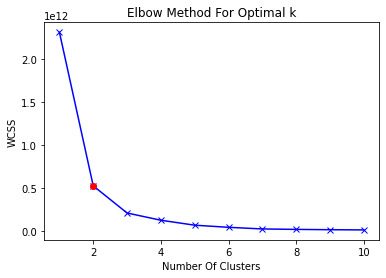

In [34]:
plt.plot(range(1, 11), WCSS, 'bx-')
plt.plot([2], WCSS[1], 'ro')  # c='r', marker='o'
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

### As we can see here, the value of cluster 2 is the elbow point, therefore the number of clusters is 2.

In [35]:
clusters = 2
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(pc_data[list(pc_data.columns)[2:]])

KMeans(n_clusters=2)

In [36]:
# The clusters centers
kmeans.cluster_centers_

array([[ 4.65159081e+01,  5.01730020e-01,  4.26485403e+03,
         5.27141339e-01, -9.44975783e-03,  3.87919110e-02,
         1.18401462e-01, -3.73451118e-03, -2.60074425e-02,
        -7.08254009e-02,  1.83307668e-02, -3.28970916e-02,
        -1.51551944e-02],
       [ 5.06830650e+01,  4.84592114e-01,  7.85445525e+03,
        -3.93835299e-01,  1.18743906e-02, -2.56397280e-02,
        -9.62981739e-02, -1.87589090e-02,  1.01823877e-02,
         5.13084758e-02, -4.78526860e-03,  2.96370518e-02,
         1.31777413e-02]])

In [37]:
pc_data['Cluster'] = kmeans.labels_

In [38]:
pc_data.head()

,Unnamed: 0,COMAX,AGE,COSEXE,CTSCPI,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,Cluster
0,0,6e3a2b9fa1,55,1,4600,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,0
1,1,1b44a67f61,41,0,4700,1.949925,-1.234185,0.496042,-1.358579,0.458379,-0.033977,0.853659,0.798448,0.051425,-0.185002,0
2,4,bdf1f63a98,32,1,3500,0.942095,-1.936260,-0.874105,0.548765,-0.028093,-0.185264,-0.685920,-0.305884,0.706565,-0.332662,0
3,6,bc9f2a4a5c,23,1,8400,2.479900,-1.195938,-0.545192,-0.405637,-0.374263,0.052177,1.254283,0.629074,-0.155007,-0.131384,1
4,8,deb8a278df,13,0,8400,-2.122563,0.176458,0.209005,0.432681,-0.118350,0.051837,0.221812,0.352136,0.183198,-0.069776,1


In [39]:
pc_data.columns[1:]

Index(['COMAX', 'AGE', 'COSEXE', 'CTSCPI', 'PCA-1', 'PCA-2', 'PCA-3', 'PCA-4',
       'PCA-5', 'PCA-6', 'PCA-7', 'PCA-8', 'PCA-9', 'PCA-10', 'Cluster'],
      dtype='object')

In [40]:
pc_data[pc_data.columns[1:]].to_csv('../cleaned-data/pc-clusters.csv', sep='\t')

In [41]:
pc_data['Cluster'].value_counts()

1    315358
0    248552
Name: Cluster, dtype: int64

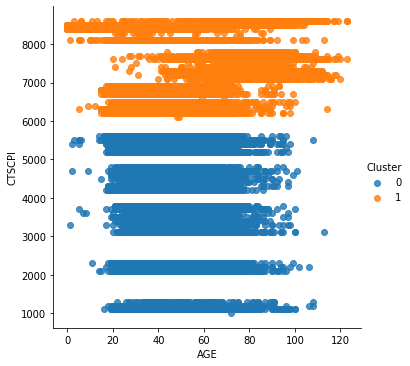

In [46]:
sns.lmplot(x='AGE', y='CTSCPI', data=pc_data, hue='Cluster',fit_reg=False)

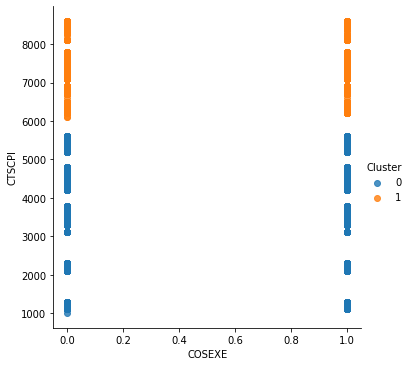

In [47]:
sns.lmplot(x='COSEXE', y='CTSCPI', data=pc_data, hue='Cluster',fit_reg=False)

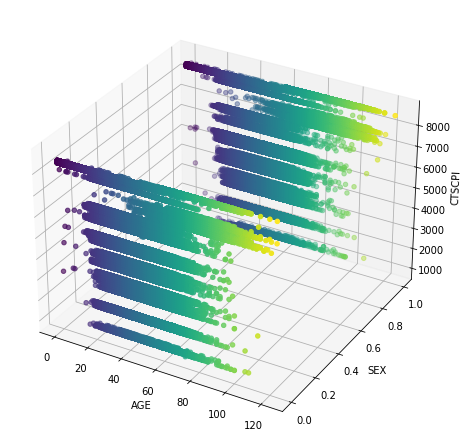

In [55]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.scatter(pc_data.AGE, pc_data.COSEXE, pc_data.CTSCPI, c=pc_data.AGE, marker='o')
ax.set_xlabel('AGE')
ax.set_ylabel('SEX')
ax.set_zlabel('CTSCPI')

plt.show()

In [15]:
temp = pd.read_csv('../cleaned-data/pc-clusters.csv', encoding='iso-8859-1', sep='\t')

In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563910 entries, 0 to 563909
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  563910 non-null  int64  
 1   COMAX       563910 non-null  object 
 2   AGE         563910 non-null  int64  
 3   COSEXE      563910 non-null  int64  
 4   CTSCPI      563910 non-null  int64  
 5   PCA-1       563910 non-null  float64
 6   PCA-2       563910 non-null  float64
 7   PCA-3       563910 non-null  float64
 8   PCA-4       563910 non-null  float64
 9   PCA-5       563910 non-null  float64
 10  PCA-6       563910 non-null  float64
 11  PCA-7       563910 non-null  float64
 12  PCA-8       563910 non-null  float64
 13  PCA-9       563910 non-null  float64
 14  PCA-10      563910 non-null  float64
 15  Cluster     563910 non-null  int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 68.8+ MB


In [6]:
temp.head()

,Unnamed: 0,COMAX,AGE,COSEXE,CTSCPI,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,Cluster
0,0,6e3a2b9fa1,55,1,4600,-1.619473,0.067995,-0.194275,0.193045,0.966118,0.434827,0.206694,-0.604399,-0.037801,-0.132362,0
1,1,1b44a67f61,41,0,4700,1.949925,-1.234185,0.496042,-1.358579,0.458379,-0.033977,0.853659,0.798448,0.051425,-0.185002,0
2,2,bdf1f63a98,32,1,3500,0.942095,-1.936260,-0.874105,0.548765,-0.028093,-0.185264,-0.685920,-0.305884,0.706565,-0.332662,0
3,3,bc9f2a4a5c,23,1,8400,2.479900,-1.195938,-0.545192,-0.405637,-0.374263,0.052177,1.254283,0.629074,-0.155007,-0.131384,1
4,4,deb8a278df,13,0,8400,-2.122563,0.176458,0.209005,0.432681,-0.118350,0.051837,0.221812,0.352136,0.183198,-0.069776,1


In [16]:
temp.Cluster.value_counts()

1    315358
0    248552
Name: Cluster, dtype: int64

In [17]:
temp.shape

(563910, 16)

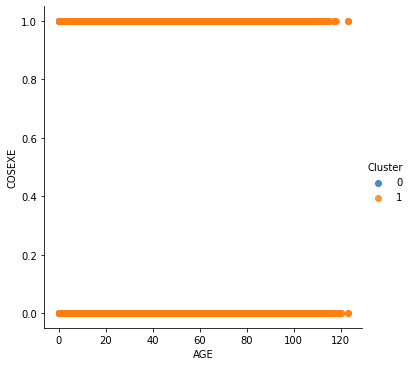

In [9]:
sns.lmplot(x='AGE', y='COSEXE', data=temp, hue='Cluster',fit_reg=False)

In [18]:
temp = pd.read_csv('../cleaned-data/mc-clusters.csv', encoding='iso-8859-1', sep='\t')

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745203 entries, 0 to 2745202
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   COMAX       object 
 2   CTPE        int64  
 3   CORELB      int64  
 4   PCA-1       float64
 5   PCA-2       float64
 6   PCA-3       float64
 7   PCA-4       float64
 8   PCA-5       float64
 9   PCA-6       float64
 10  PCA-7       float64
 11  PCA-8       float64
 12  PCA-9       float64
 13  PCA-10      float64
 14  Cluster     int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 314.2+ MB


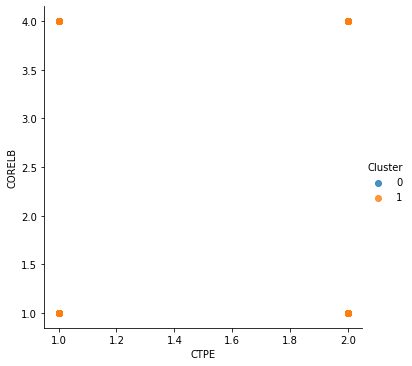

In [13]:
sns.lmplot(x='CTPE', y='CORELB', data=temp, hue='Cluster',fit_reg=False)

In [14]:
temp.Cluster.value_counts()

1    1373843
0    1371360
Name: Cluster, dtype: int64

In [19]:
temp.shape

(2745203, 15)